In [8]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import joblib

In [9]:
# Load data
# df = pd.read_csv('gestures_dataset.csv')
df = pd.read_csv('/content/asl_alphabet_dataset.csv')
df.head()

,label,sample_id,x0,y0,z0,x1,y1,z1,x2,y2,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,A,1,0.457428,0.583321,-6.474007e-07,0.570786,0.503428,-0.035580,0.640131,0.373976,...,-0.030642,0.391186,0.321072,-0.070152,0.404947,0.404261,-0.055443,0.403822,0.457566,-0.028879
1,A,2,0.485155,0.613102,-7.789129e-07,0.602762,0.543648,-0.027501,0.674942,0.405732,...,-0.038081,0.432534,0.362228,-0.074631,0.445967,0.451188,-0.063124,0.443897,0.506400,-0.041344
2,A,4,0.723598,0.674288,-6.069148e-07,0.796444,0.618316,-0.031920,0.847458,0.513981,...,-0.008414,0.623643,0.453718,-0.038728,0.630732,0.510247,-0.031833,0.640717,0.556273,-0.014879
3,A,5,0.713132,0.752423,-4.974553e-07,0.830180,0.650730,-0.042259,0.897590,0.497577,...,-0.049661,0.604212,0.449319,-0.108915,0.632593,0.545551,-0.094142,0.637691,0.612206,-0.063156
4,A,6,0.716940,0.759032,-4.832657e-07,0.833547,0.666843,-0.041384,0.903522,0.504841,...,-0.053805,0.611438,0.459419,-0.115095,0.639612,0.556720,-0.102434,0.649539,0.625443,-0.072584


In [10]:
X = df.drop(['label', 'sample_id'], axis=1)
y = df['label']

In [11]:
y.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       'space', 'nothing'], dtype=object)

In [12]:
NUM_CLASSES = len(y.unique())
INPUT_DIM = X.shape[1]

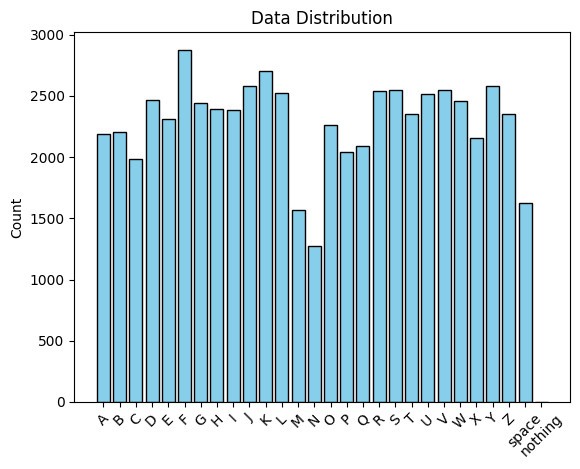

In [54]:
labels = []
counts = []

for ges in y.unique():
    labels.append(ges)
    counts.append(df[df['label'] == ges].shape[0])

plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Data Distribution")
plt.show()

In [ ]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=NUM_CLASSES)

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split into training (for further split into train/val) and test sets
X_temp_train, X_test, y_temp_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=np.argmax(y_categorical, axis=1)
)

# Further split the temporary training set into actual training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_temp_train, y_temp_train, test_size=0.5, random_state=42, stratify=np.argmax(y_temp_train, axis=1)
)

In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(INPUT_DIM, )),
    BatchNormalization(),
    Dropout(0.3),

    # Hidden layer 1
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Hidden layer 2
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    # Hidden layer 3
    Dense(64, activation='relu'),
    Dropout(0.2),

    # Output layer
    Dense(NUM_CLASSES, activation='softmax')
    ])
model.compile(
    optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 28)             │         1,820 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,708 (498.86 KB)

 Trainable params: 126,428 (493.86 KB)

 Non-trainable params: 1,280 (5.00 KB)

In [ ]:
# Callbacks
callbacks = [
    tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)
]

history = model.fit(
            X_train, y_train,
            batch_size=32,
            epochs=100,
            validation_data=(X_val, y_val),
            callbacks=callbacks,
            verbose=1
)

Epoch 1/100
775/775 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.5464 - loss: 1.5843 - val_accuracy: 0.9522 - val_loss: 0.1529 - learning_rate: 0.0010
Epoch 2/100
775/775 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8967 - loss: 0.3126 - val_accuracy: 0.9663 - val_loss: 0.1164 - learning_rate: 0.0010
Epoch 3/100
775/775 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9303 - loss: 0.2231 - val_accuracy: 0.9668 - val_loss: 0.1074 - learning_rate: 0.0010
Epoch 4/100
775/775 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9355 - loss: 0.2017 - val_accuracy: 0.9749 - val_loss: 0.0852 - learning_rate: 0.0010
Epoch 5/100
775/775 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9426 - loss: 0.1814 - val_accuracy: 0.9759 - val_loss: 0.0835 - learning_rate: 0.0010
Epoch 6/100
775/775 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9485 - loss: 0.1736 - val_accuracy: 0.9781 - val_loss: 0.0786 - learning_rate: 0.0010
Epoch 7/100
775/775 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9538 - loss: 

In [ ]:
print(np.array(X_test).shape, np.array(X_train).shape)
print(np.array(y_test).shape, np.array(y_train).shape)

(12395, 63) (24790, 63)
(12395, 28) (24790, 28)


388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9932 - loss: 0.0303
Test Loss: 0.0330
Test Accuracy: 0.9923


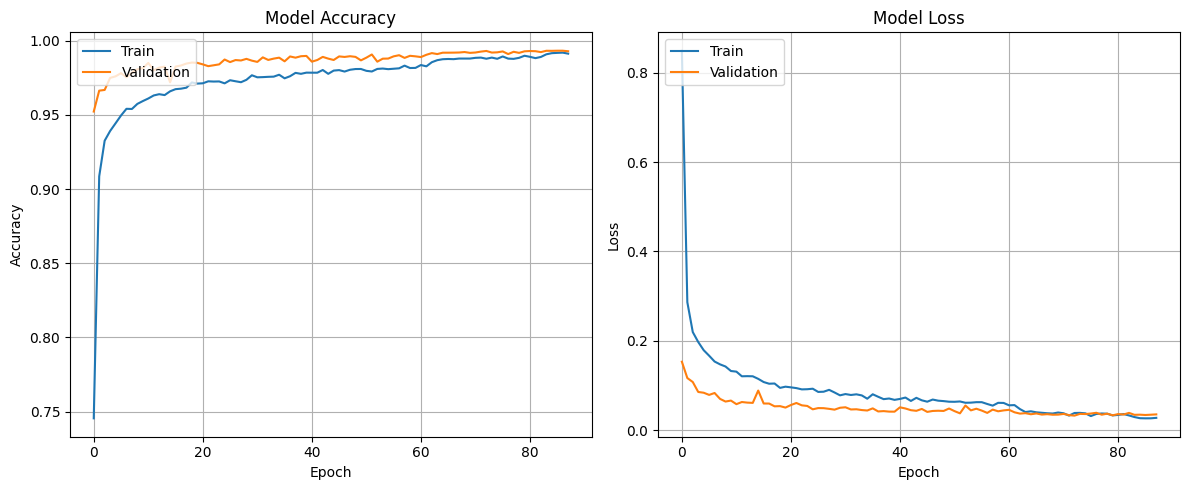

388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


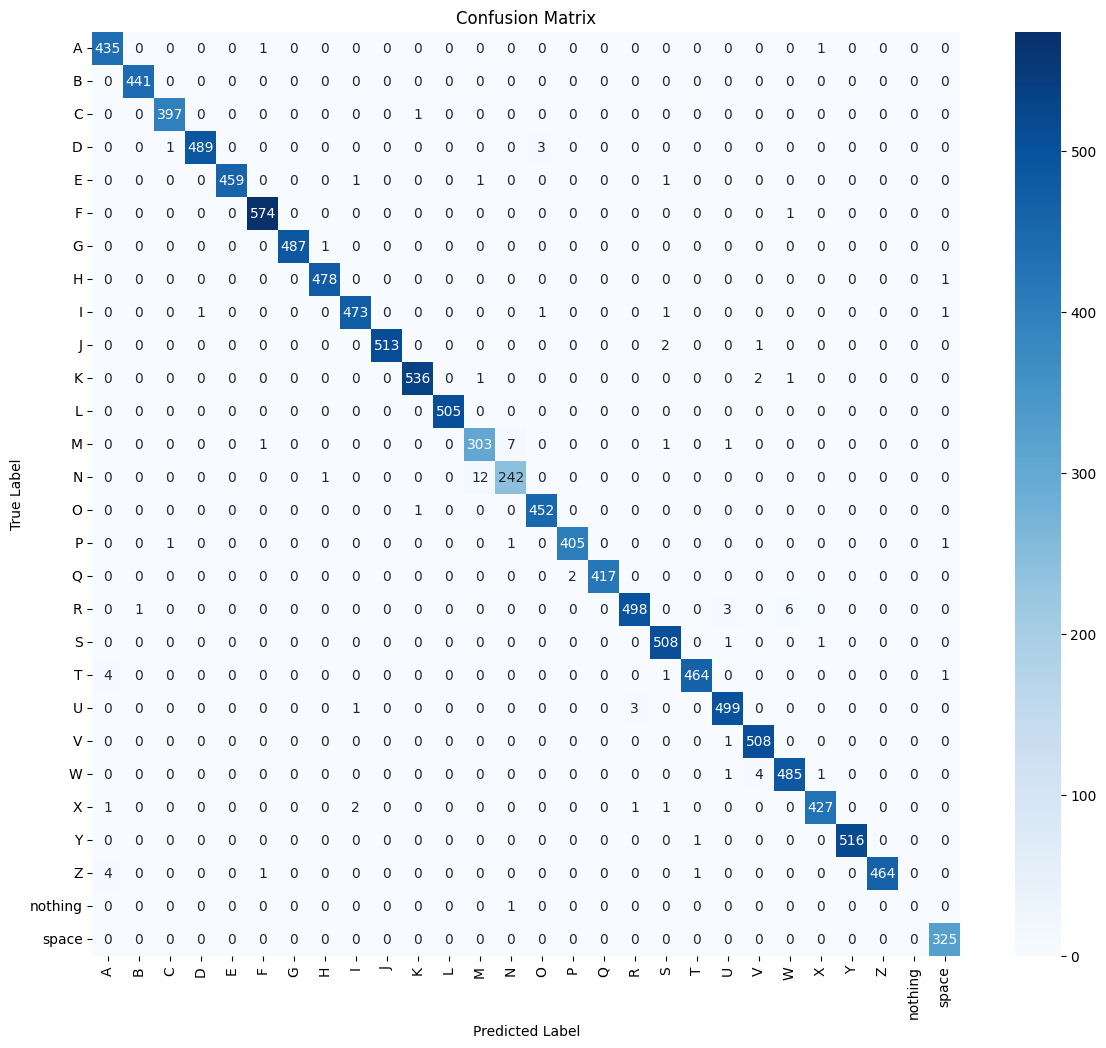

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Evaluate model on the test set
loss, accuracy = model.evaluate(np.array(X_test), np.array(y_test), batch_size=32)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Training history training,validation for accuracy & loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

# Confusion Matrix
y_pred_probs = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

class_names = le.classes_

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
filename='custom_gesture_model.pkl'
model_data = {
    'model': model,
    'label_encoder': le,
    'scaler': scaler,
    'num_classes': NUM_CLASSES,
    'input_dim': INPUT_DIM
}
joblib.dump(model_data, filename)
print(f"Model saved as {filename}")

Model saved as custom_gesture_model.pkl


In [ ]:
model_data = joblib.load(filename)
model = model_data['model']
label_encoder = model_data['label_encoder']
scaler = model_data['scaler']
num_classes = model_data['num_classes']
input_dim = model_data['input_dim']